# Stack overflow annual developer survey
## Data Analysis project

#### Questions to answer
##### * At what companies do developers get the paid the most?
##### * How much does remote working matter to employees?
##### * How does coding expirence affect the level of pay?
##### * What's the most popular method of learning to code?
##### * Are you more likely to get a job as a developer if you have a master's degree?

In [35]:
!pip install pandas matplotlib seaborn


In [36]:
import pandas as pd

# Load the dataset 
df = pd.read_csv(r'C:\Users\K A L K I D A N\OneDrive\Desktop\projects\data cleaning\stack-overflow-developer-survey-2024\survey_results_public.csv')


In [37]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [20]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [38]:
print(df.shape)

(65437, 114)


In [39]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Optionally, fill missing values or drop rows with missing important columns
df = df.dropna(subset=['RemoteWork', 'CodingActivities', 'EdLevel'])  # Example for specific columns


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [40]:
# Strip spaces or replace empty strings
df['RemoteWork'] = df['RemoteWork'].str.strip().replace('', 'Unknown')
df['CodingActivities'] = df['CodingActivities'].str.strip().replace('', 'Unknown')
df['EdLevel'] = df['EdLevel'].str.strip().replace('', 'Unknown')


In [41]:
# Convert salary column to numeric (if needed)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Convert categorical columns to category type
df['RemoteWork'] = df['RemoteWork'].astype('category')
df['CodingActivities'] = df['CodingActivities'].astype('category')
df['EdLevel'] = df['EdLevel'].astype('category')


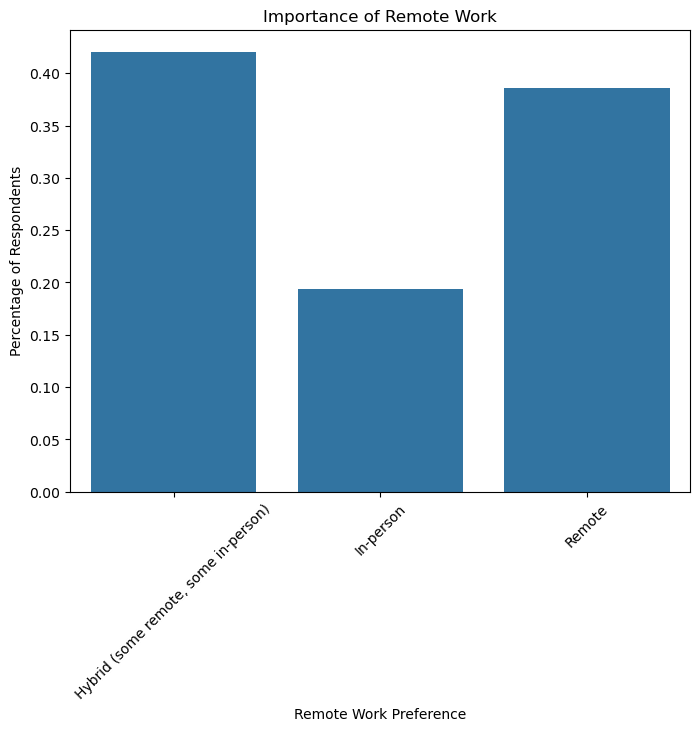

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the importance of remote work
remote_work = df['RemoteWork'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=remote_work.index, y=remote_work.values)
plt.title('Importance of Remote Work')
plt.xlabel('Remote Work Preference')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.show()


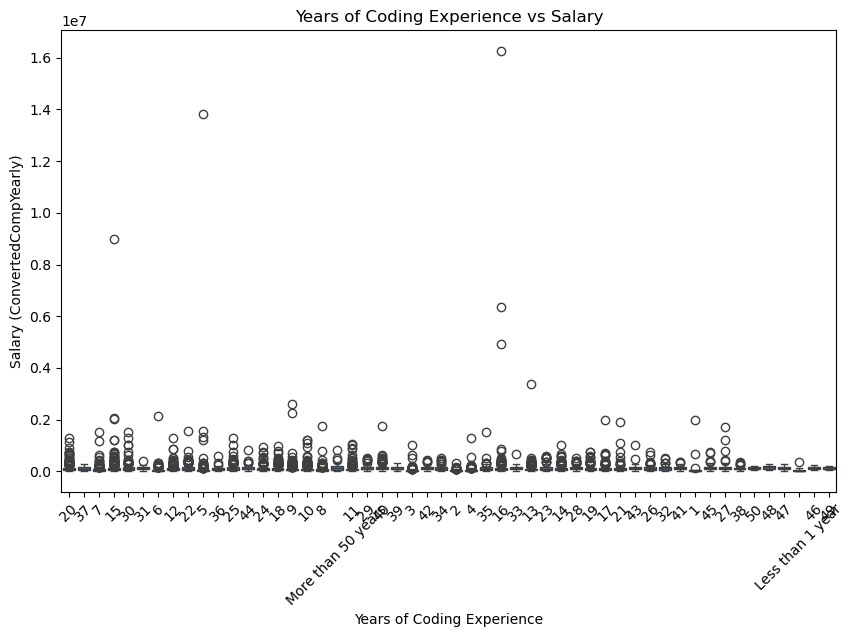

In [43]:
# Analyze coding experience vs salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearsCode', y='ConvertedCompYearly', data=df)
plt.title('Years of Coding Experience vs Salary')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Salary (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.show()


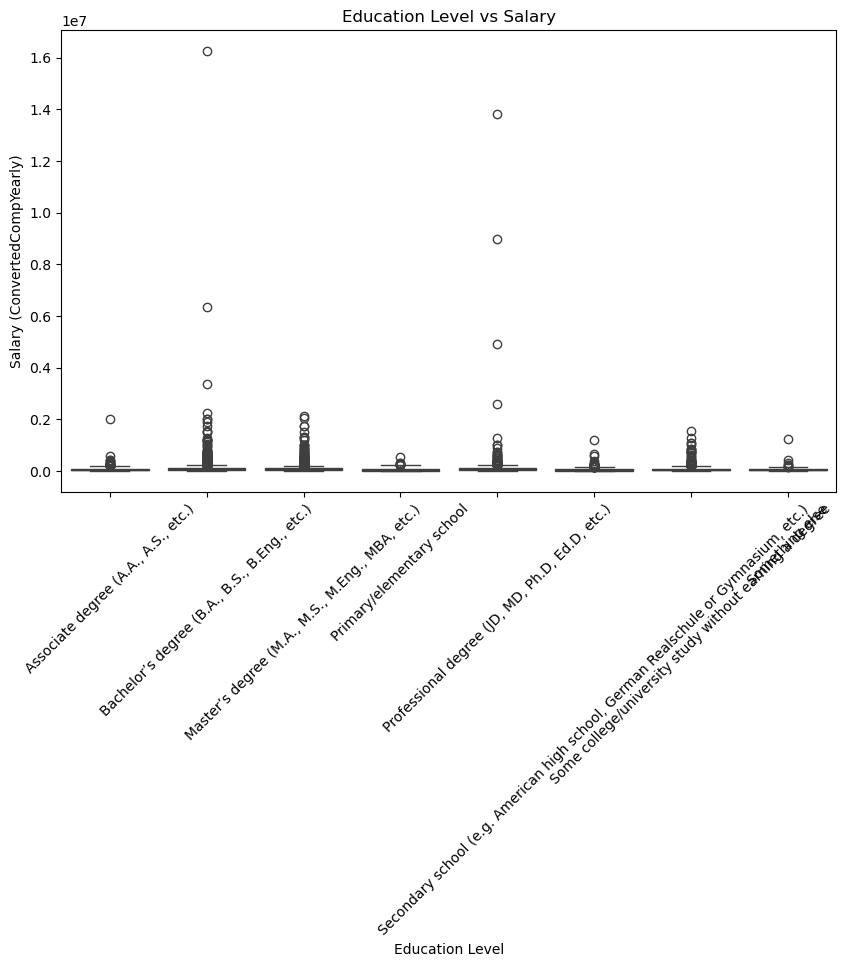

In [44]:
# Analyze Education level vs Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='EdLevel', y='ConvertedCompYearly', data=df)
plt.title('Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.show()


In [45]:
# Assuming 'Employment' column represents company type or name
company_salary = df.groupby('Employment')['ConvertedCompYearly'].mean().sort_values(ascending=False)
print(company_salary)


Employment
Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired                                                                     803285.000000
Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Retired                                                                     348183.000000
Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work                                          279256.000000
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time                                                                            253273.720588
Independent contractor, freelancer, or self-employed;Employed, part-time;Retired                                                                                        180000.000000
                                                                               

In [46]:
remote_work_counts = df['RemoteWork'].value_counts()
print(remote_work_counts)


RemoteWork
Hybrid (some remote, some in-person)    21517
Remote                                  19719
In-person                                9917
Name: count, dtype: int64


In [47]:
# Assuming 'Employment' column shows job status and 'EdLevel' contains education levels
employment_by_degree = df.groupby('EdLevel')['Employment'].value_counts()
print(employment_by_degree)


EdLevel                              Employment                                                                                                                                                          
Associate degree (A.A., A.S., etc.)  Employed, full-time                                                                                                                                                     1057
                                     Independent contractor, freelancer, or self-employed                                                                                                                     142
                                     Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                 104
                                     Employed, part-time                                                                                                                

C:\Users\K A L K I D A N\AppData\Local\Temp\ipykernel_21384\1412125780.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employment_by_degree = df.groupby('EdLevel')['Employment'].value_counts()


In [48]:
# Save the cleaned and processed data if needed
df.to_csv('processed_data.csv', index=False)

# Final summary
print(df.describe())


         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  51153.000000   3.371900e+04  29641.000000    29305.000000   
mean   30723.896213  2.965687e+145     11.464256       18.585122   
std    18190.860462  5.445812e+147      9.162151       25.965898   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    15177.000000   6.000000e+04      4.000000        0.000000   
50%    30236.000000   1.100000e+05      9.000000       10.000000   
75%    45972.000000   2.500000e+05     16.000000       22.000000   
max    65436.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29374.000000    29392.000000    29431.000000    29429.000000   
mean         7.522239       10.061407       24.348414       22.970023   
std         18.420886       21.833587       27.087777       27.018791   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000 